In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
aqi = pd.read_csv('c4_epa_air_quality.csv')

In [3]:
# explore dataframe

print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))

print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


In [4]:
# Summarize the mean AQI for RRE states.

# Create list for RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]


# Find the mean aqi for each of the RRE states.
aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


<Axes: xlabel='state_name', ylabel='aqi'>

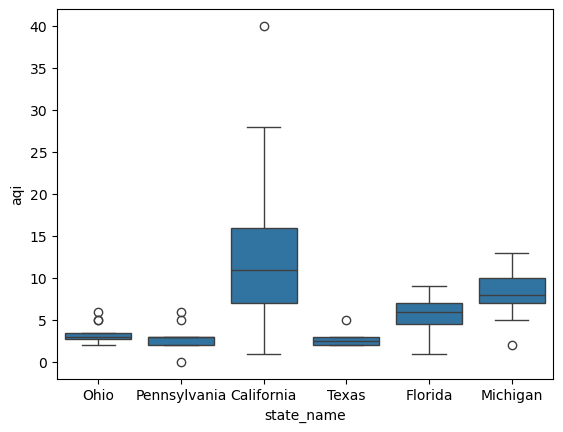

In [6]:
# Create an in-line visualization showing the distribution of aqi by state_name
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

In [7]:
# Find the mean aqi for your state.
aqi_ca = aqi[aqi['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

In [8]:
# Confidence level.

confidence_level = 0.95
confidence_level

0.95

In [9]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.

z_value = 1.96

# Next, calculate your standard error.

standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

# Lastly, use the preceding result to calculate your margin of error.

margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127413
margin of error:
1.7614930896609728


In [10]:
# Calculate your confidence interval (upper and lower limits).
upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(10.359719031551148, 13.882705210873095)

In [12]:
# Recalculate confidence interval

stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

(10.359751399400034, 13.882672843024208)